<a href="https://colab.research.google.com/github/AdrienneLoc/AI/blob/main/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Genetic Algorithms
## Author: Adrienne Loc
Purpose: The purpose of this experiment was to explore genetic algorithms and how they operate. In this experiment, I conducted 5 trials consisting of

> the minimization of the cross section function: $ f_{1} = 2x_{2}x_{4} + x_{3}(x_{1} - 2x_{4})$ <br><br>
> the static deflection function: $ f_{2} = \frac{60000}{((x3*((x1-2*x4)^3)) + ((2*x2*x4)*(4*(x4)^2)) + ((3*x1)*(x1 - 2*x4)))}$<br><br>
>the combination of the 2 functions: $F = a*f_{1} + b*f_{2}$ with a and b being the degree of importance associated with each function<br><br>
The goal of this experiment was to find a solution in which both functions were minimized at the same time.


In [6]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

library(GA)
library(plotly)
library(ggplot2)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




Warning message in 2 * x2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x3 * (x1 - 2 * x4):
“longer object length is not a multiple of shorter object length”


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -71.27812 
Solution = 
           x1       x2       x3       x4
[1,] 22.64636 12.72875 1.800779 1.395366

Generation 1 Solution:  25.07676 12.32193 1.664968 2.450205 
Generation 2 Solution:  25.07676 12.32193 1.664968 2.450205 
Generation 3 Solution:  26.58943 12.15012 2.075338 1.836438 
Generation 4 Solution:  25.28517 11.81733 1.681404 2.229664 
Generation 5 Solution:  25.28517 11.81733 1.681404 2.229664 
Generation 6 Solution:  26.55943 12.77919 1.82463 1.355423 
Generation 7 Solution:  26.55943 12.77919 1.82463 1.355423 
Generation 8 Solution:  22.32472 12.8868 1.90401 1.368909 
Generation 9 Solution:  22.32472 12.8868 1.90401 1.368909 
Generation 10 Solution:  22.32472 12.8868 1.90401 1.368909 
Generation 11 Solution:  22.32472 12.8868 1.90401 1.368909 
Generation 12 Solution:  22.32472 12.8868 1.90401 1.368909 
Generation 13 Solution:  22.69792 12.74916 1.80997 1.404918 
Generation 14 Solution:  22.69792 12.74916 1.80997 1.404918 
Generation 15 Solution:  22.69796 12.76138 1.784473 1.421867 
Generation 16 Solution:  22.56586 12.76742 1.833 1.379493 
Generation 17 Solution:  22.59647 

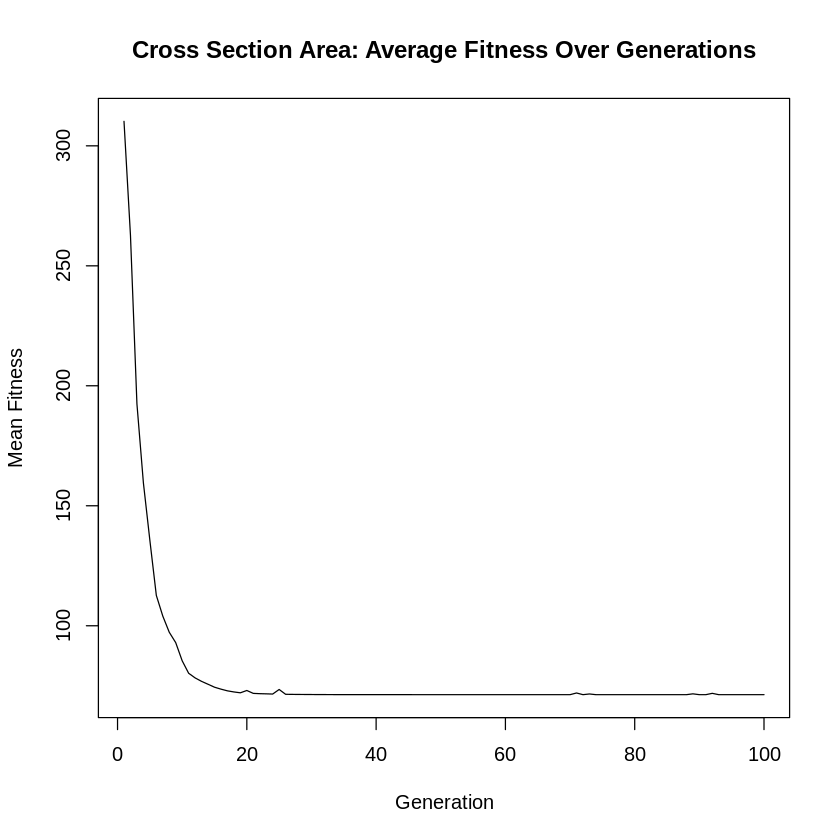

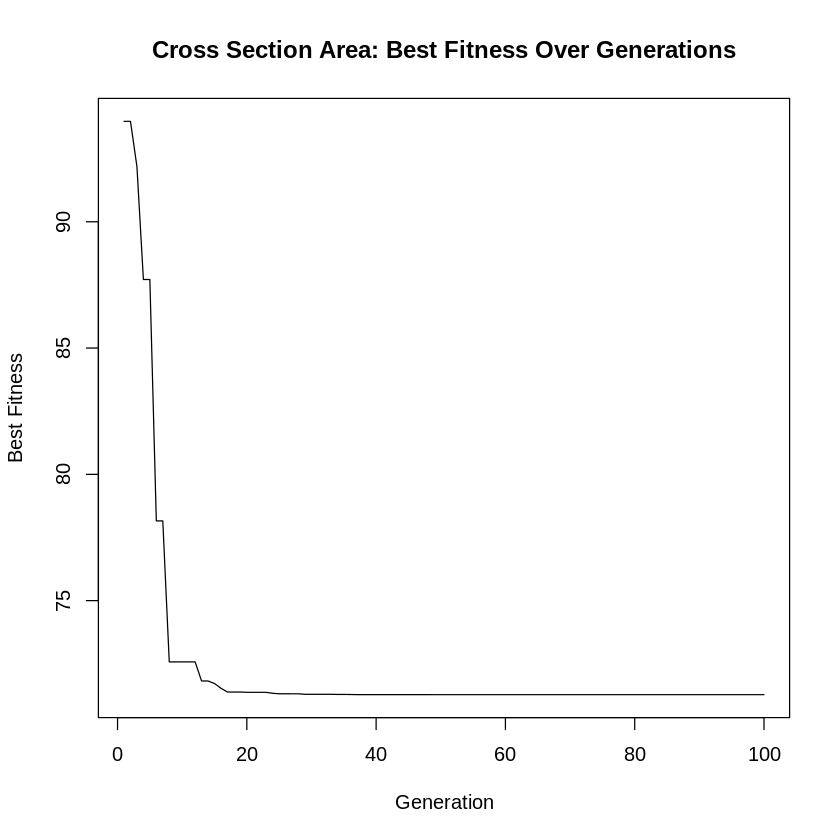

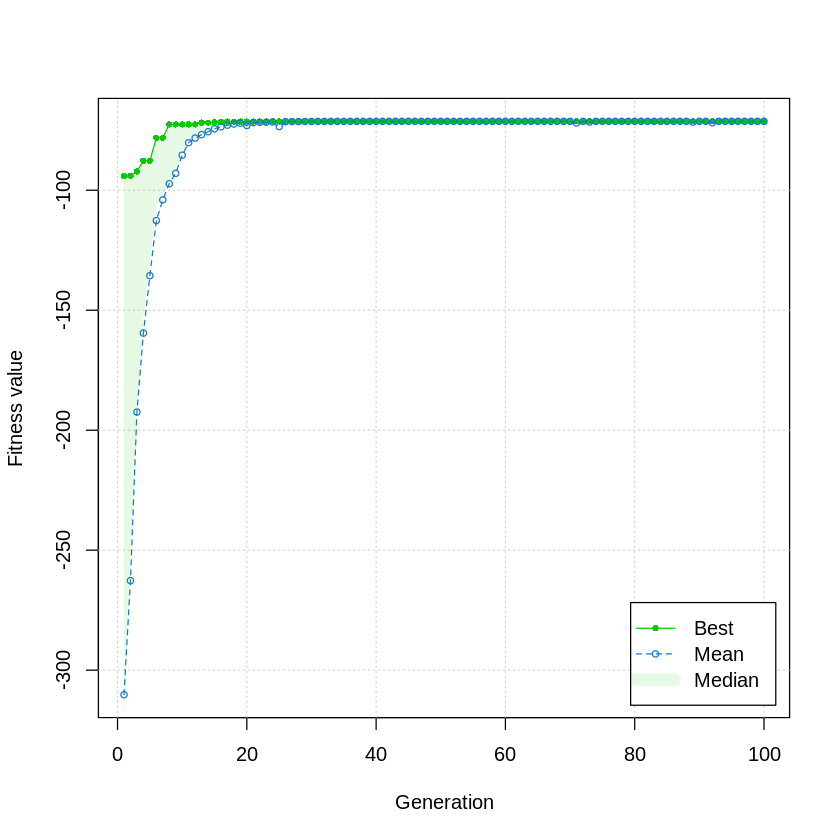

In [71]:
func1 <- function(x1, x2, x3, x4)
{
  2*x2*x4 + x3*(x1 - 2*x4)
}


# Parameters constraints
x1 <- seq(10, 80, by = 0.1)
x2 <- seq(10, 50, by = 0.1)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

f <- outer(x1, x2, func1, x3, x4)

mean_fitness_values <- numeric()
best_fitness_values <- numeric()
solutions <- vector("list", length = 100)
#storing the mean and max values
monitor <- function(obj) {
  mean_fitness_values <<- c(mean_fitness_values, -1 * mean(obj@fitness))
  best_fitness_values <<- c(best_fitness_values, -1 * max(obj@fitness))
  solutions[obj@iter] <<- obj@bestSol[obj@iter]
}

#Cross Section Area Function
GA <- ga(type = "real-valued",
         fitness =  function(x) - func1(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001, keepBest = TRUE, monitor = monitor)


summary(GA)

#printing out best fitness values for each generation
counter = 1
for (solution in solutions){
  cat("Generation", counter, "Solution: ", solution, "\n")
  counter = counter + 1
}

plot(mean_fitness_values, type = 'l', main = "Cross Section Area: Average Fitness Over Generations",
      xlab = "Generation", ylab = "Mean Fitness")

plot(best_fitness_values, type = 'l', main = "Cross Section Area: Best Fitness Over Generations",
      xlab = "Generation", ylab = "Best Fitness")


plot(GA)

#Trial 1: The Minimization of the cross section function $f_{1}$
##Goal:
>### The minimization of the function $f_{1}$
##Method:
>### I minimized the function $f_{1}$ by multiplying the $f_{1}$ by -1. I ran this algorithm for 100 generations using the values 0.75 and 0.001 as the crossover and mutation probability respectively, and a population of 50. I then stored the best solutions for each generation, along with the best and average fitness values for each generation, and plotted them to get a better image of my results.
##Results:
>### Since the function is supposed to be minimized, the lower the fitness value, the better it is. According the results displayed by the algorithm, the best fitness value for the cross section area started at around 100 with the average fitness values of the beginning generation being around the 300s. After generation 20, the fitness values seem to reach a convergence at around 70 - 71, showing that the fitness value has reached the best value it could achieve and this convergence or stand still is shown in both the average and best graph where, after generation 20, there are rarely if any drops in the fitness value. The range of the solutions, more specifically x1 and x2 ranges from 22-25 for x1 and 11-12 for x2. These values become significant in the next trial.


Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x3 * ((x1 - 2 * x4)^3):
“longer object length is not a multiple of shorter object length”
Warning message in 2 * x2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in (2 * x2 * x4) * (4 * (x4)^2):
“longer object length is not a multiple of shorter object length”
Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.03031841 
Solution = 
           x1       x2       x3     x4
[1,] 77.64626 36.71128 4.923736 2.0462

Generation 1 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 2 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 3 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 4 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 5 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 6 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 7 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 8 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 9 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 10 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 11 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 12 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 13 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 14 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 15 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 16 Solution:  77.64771 19.44485 4.924412 3.23212 
Generation 17 Solution:  77.64771

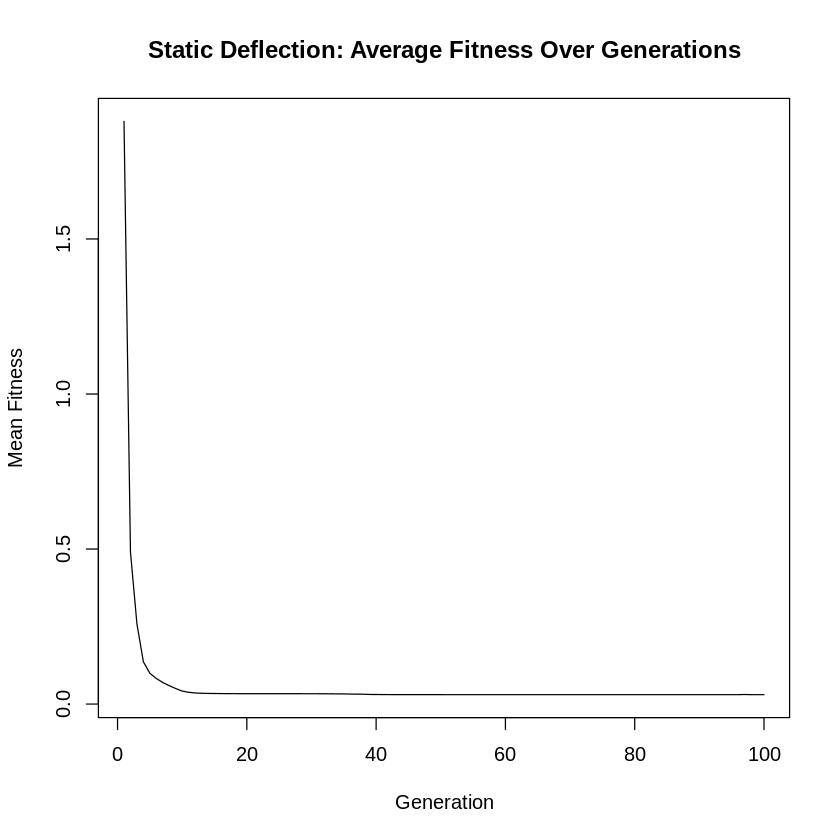

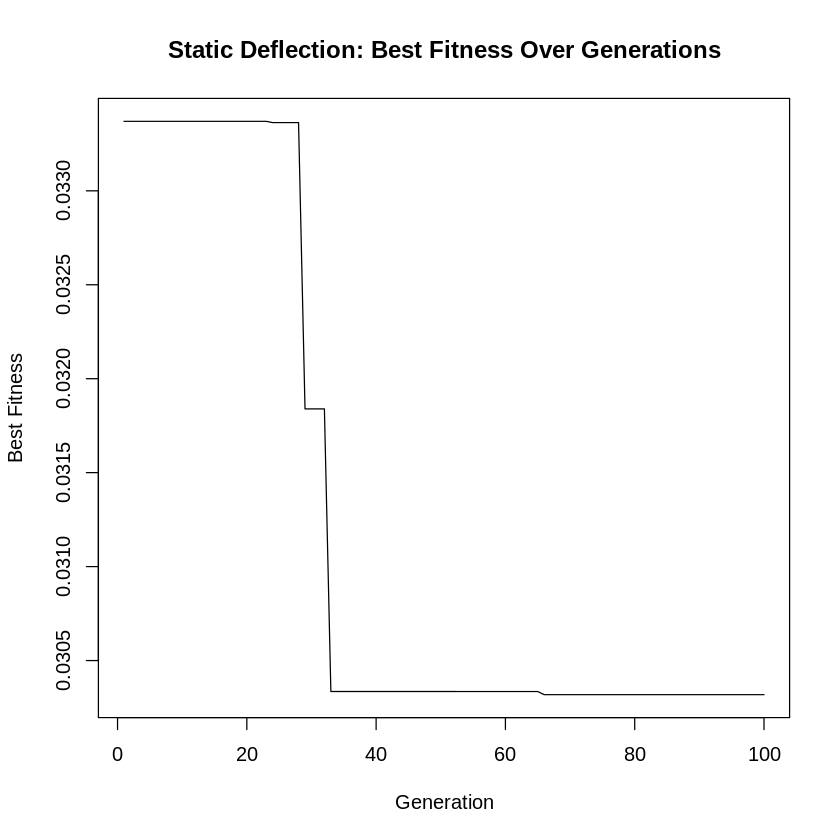

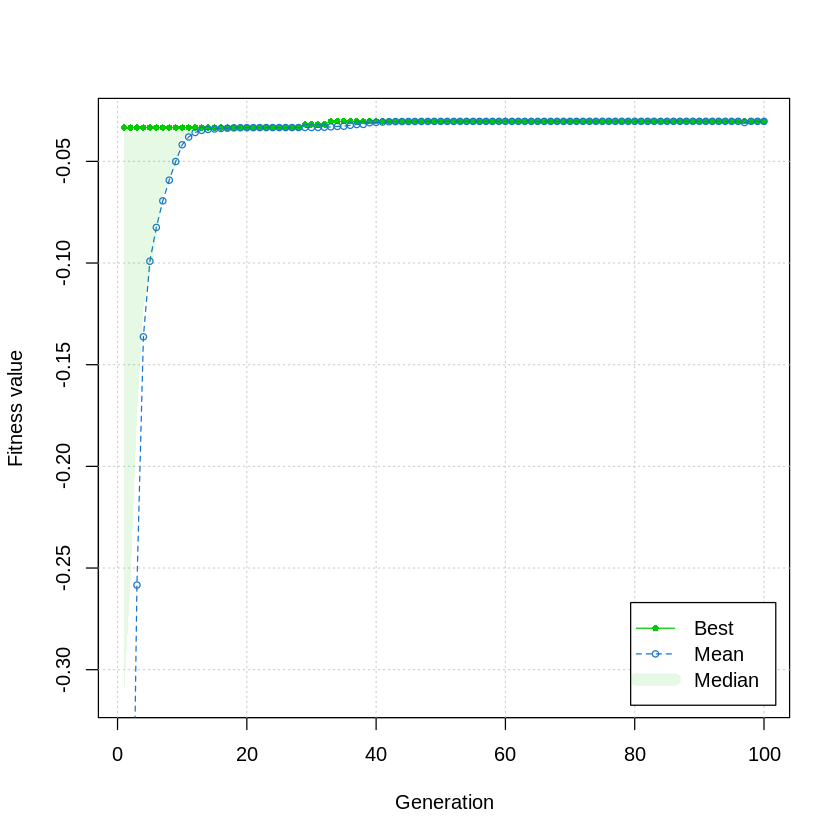

In [73]:
func2 <- function(x1, x2, x3, x4)
{
  60000/((x3*((x1-2*x4)^3)) + ((2*x2*x4)*(4*(x4)^2)) + ((3*x1)*(x1 - 2*x4)))
}


f <- outer(x1, x2, func2, x3, x4)

mean_fitness_values2 <- numeric()
best_fitness_values2 <- numeric()
solutions2 <- vector("list", length=100)

#storing the mean and max values
monitor <- function(obj) {
  mean_fitness_values2 <<- c(mean_fitness_values2, -1 * mean(obj@fitness))
  best_fitness_values2 <<- c(best_fitness_values2, -1 * max(obj@fitness))
  solutions2[obj@iter] <<- obj@bestSol[obj@iter]
}

#Cross Section Area Function
GA <- ga(type = "real-valued",
         fitness =  function(x) - func2(x[1], x[2], x[3], x[4]),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001, keepBest = TRUE, monitor = monitor)


summary(GA)

#printing out best fitness values for each generation
counter = 1
for (solution in solutions2){
  cat("Generation", counter, "Solution: ", solution, "\n")
  counter = counter + 1
}

plot(mean_fitness_values2, type = 'l', main = "Static Deflection: Average Fitness Over Generations",
      xlab = "Generation", ylab = "Mean Fitness")

plot(best_fitness_values2, type = 'l', main = "Static Deflection: Best Fitness Over Generations",
      xlab = "Generation", ylab = "Best Fitness")

plot(GA)

#Trial 2: The Minimization of the static deflection function $f_{2}$
##Goal:
>### The minimization of the function $f_{2}$
##Method:
>### I minimized the function $f_{2}$ by multiplying the $f_{2}$ by -1. I ran this algorithm for 100 generations using the values 0.75 and 0.001 as the crossover and mutation probability respectively, and a population of 50. I then stored the best solutions for each generation, along with the best and average fitness values for each generation, and plotted them to get a better image of my results.
##Results:
>### Since the function is supposed to be minimized, the lower the fitness value, the better it is. According the results displayed by the algorithm, the best fitness value for the static deflection area started above 0.0330 with the average fitness values of the beginning generation being close to 2. The best fitness values for each generation seemed to remain consistent in the beginning until it reached around generation 25 - 30 where we can see a steep drop in the best fitness values before finally reaching a true convergence where it no longer improved (besides for the small improvement at around generation 65). The average fitness value for the generations, however, reached a convergence much more quickly where the average fitness values reached a stand still at around generation 10.

# Comparison to $f_{1}$:
>### In comparison with $f_{1}$, it took the fitness values of $f_{2}$ longer to reach convergence. However, the difference in these two functions can be seen in the solutions for each of these functions, namely the $x_{1}$ and $x_{2}$ variables. In $f_{2}$, the solutions for x1 and x2 are significantly higher than that of $f_{1}$'s solutions for x1 and x2. The goal was to be able to minimize both functions. Based on the current solutions, however, the minimization of both functions appears to be impossible since to minimize the $f_{2}$, all the variables of $f_{2}$ would need to increase and this would directly make it impossible for $f_{1}$ to be minimized since the variables for $f_{1}$ would need to decrease.

Warning message in 2 * x2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x3 * (x1 - 2 * x4):
“longer object length is not a multiple of shorter object length”
Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x3 * ((x1 - 2 * x4)^3):
“longer object length is not a multiple of shorter object length”
Warning message in 2 * x2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in (2 * x2 * x4) * (4 * (x4)^2):
“longer object length is not a multiple of shorter object length”
Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -25.28018 
Solution = 
           x1      x2       x3        x4
[1,] 20.85718 14.8991 2.476607 0.9981002

Generation 1 Solution:  23.16568 12.90421 3.033535 0.9033665 
Generation 2 Solution:  23.16568 12.90421 3.033535 0.9033665 
Generation 3 Solution:  23.16568 12.90421 3.033535 0.9033665 
Generation 4 Solution:  23.16568 12.90421 3.033535 0.9033665 
Generation 5 Solution:  23.16568 12.90421 3.033535 0.9033665 
Generation 6 Solution:  23.16568 12.90421 3.033535 0.9033665 
Generation 7 Solution:  23.16568 12.90421 3.033535 0.9033665 
Generation 8 Solution:  23.16568 12.90421 3.033535 0.9033665 
Generation 9 Solution:  22.65006 13.79946 2.93426 0.9336383 
Generation 10 Solution:  20.39917 14.60334 2.476562 1.242782 
Generation 11 Solution:  20.39917 14.60334 2.476562 1.242782 
Generation 12 Solution:  20.87517 13.99672 2.881132 1.019332 
Generation 13 Solution:  20.87517 13.99672 2.881132 1.019332 
Generation 14 Solution:  21.39683 15.5451 2.463797 1.022019 
Generation 15 Solution:  21.50688 14.81961 2.510484 1.008671 
Generation 16 Solution:  20.93813 14.84274 2.528053 0.9880535 
Generatio

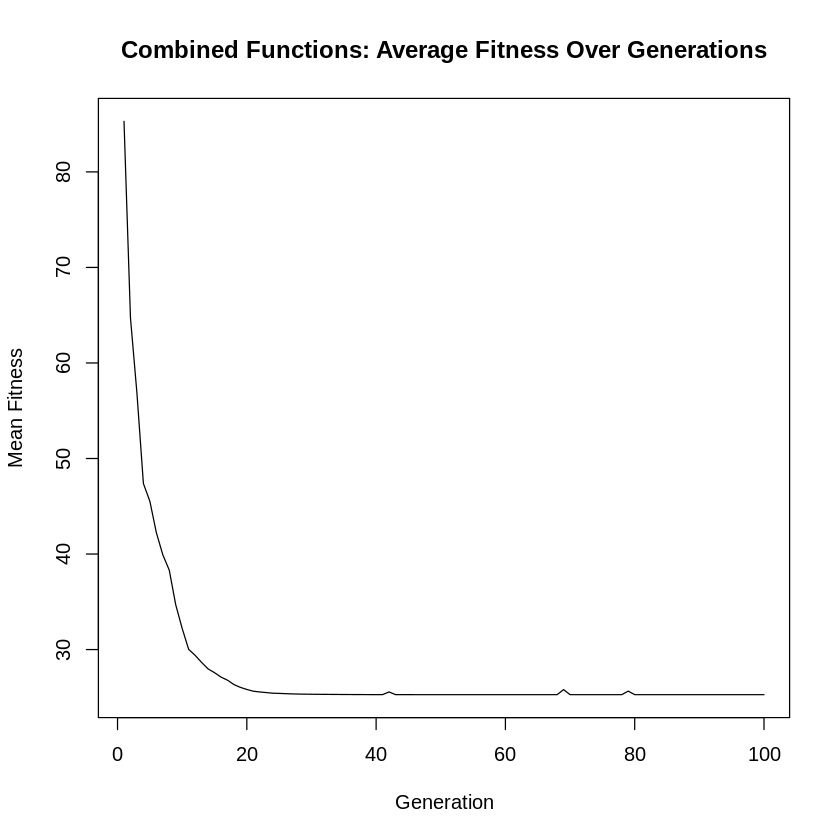

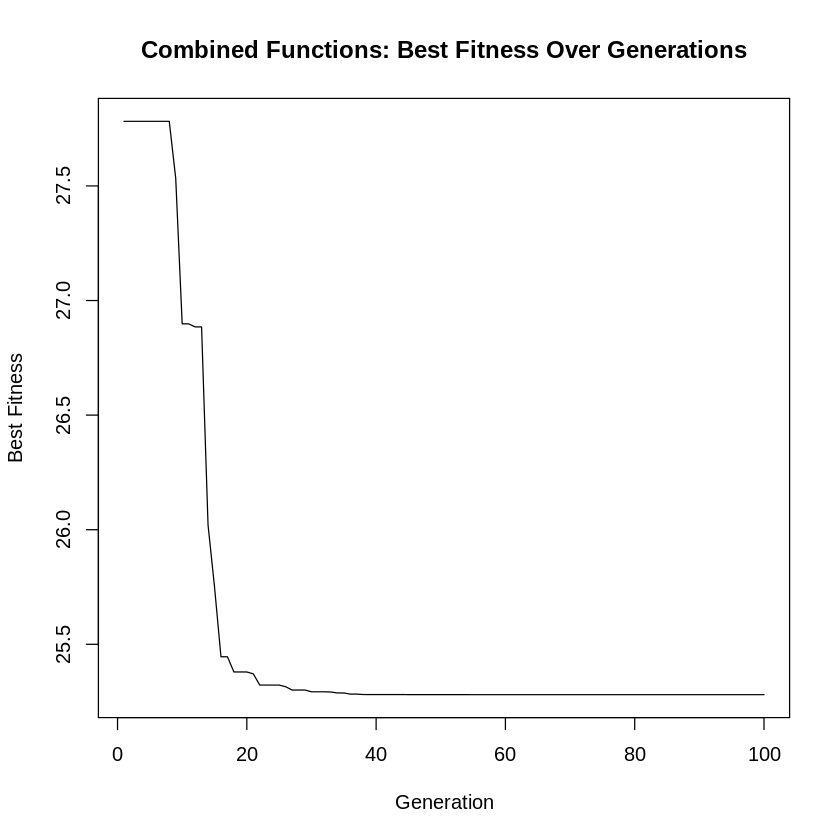

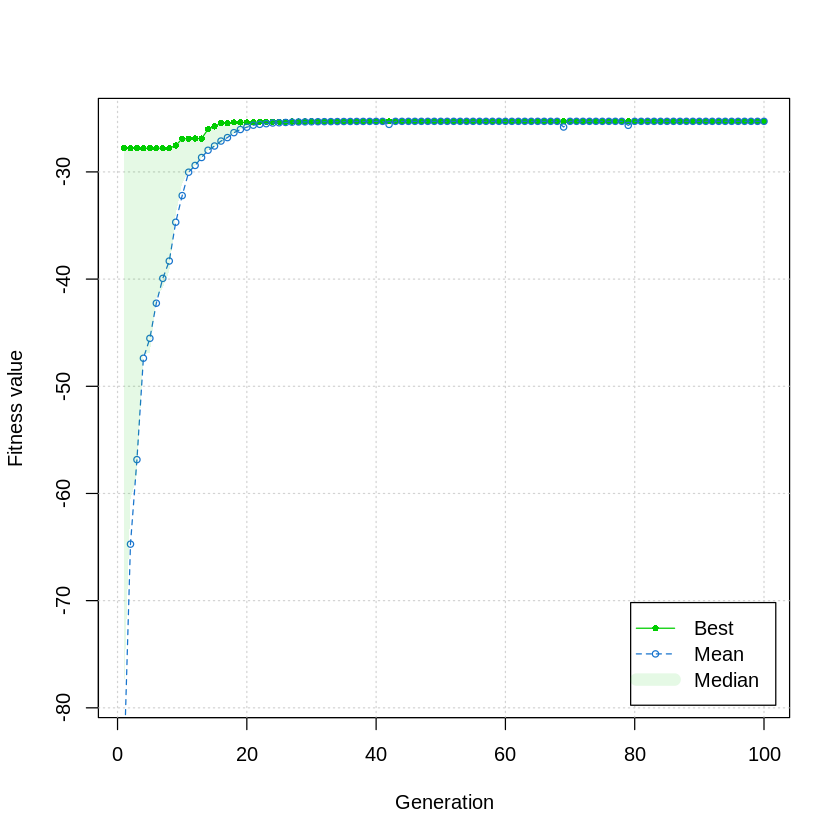

In [74]:


func3 <- function(x1, x2, x3, x4, a, b) #combining the two functions
{
  a*func1(x1, x2, x3, x4) + b*func2(x1, x2, x3, x4)
}

#placing more importance on function 2 (static deflection)
a = 0.3
b = 0.7
f <- outer(x1, x2, func3, x3, x4, a, b)

mean_fitness_values3 <- numeric()
best_fitness_values3 <- numeric()
solutions3 <- vector("list", length = 100)

#storing the mean and max values
monitor <- function(obj) {
  mean_fitness_values3 <<- c(mean_fitness_values3, -1 * mean(obj@fitness))
  best_fitness_values3 <<- c(best_fitness_values3, -1 * max(obj@fitness))
  solutions3[obj@iter] <<- obj@bestSol[obj@iter]
}

#Cross Section Area Function
GA <- ga(type = "real-valued",
         fitness =  function(x) - func3(x[1], x[2], x[3], x[4], a, b),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001, keepBest = TRUE, monitor = monitor)


summary(GA)

#printing out best fitness values for each generation
counter = 1
for (solution in solutions3){
  cat("Generation", counter, "Solution: ", solution, "\n")
  counter = counter + 1
}

plot(mean_fitness_values3, type = 'l', main = "Combined Functions: Average Fitness Over Generations",
      xlab = "Generation", ylab = "Mean Fitness")

plot(best_fitness_values3, type = 'l', main = "Combined Functions: Best Fitness Over Generations",
      xlab = "Generation", ylab = "Best Fitness")

plot(GA)

#Trial 3: The Minimization of the both functions in one function: $f_{3}$
##Goal:
>### The minimization of both functions by combining them into one function (favoring $f_{2}$)
##Method:
>### In order to find a way to get a solution that considered the fact that I needed to minimize both functions at the same time, I combined $f_{1}$ and $f_{2}$ into one function $f_{3}$ and assigned each function a "weight" that it was multiplied by. The weight acts as, essentially, the bias or deciding factor for picking what fitness value was the best fitness value. The higher the weight, the more importance was place on the goal of that specific function. **In this first trial of minimizing $f_{3}$, I decided to place more importance on $f_{2}$, the minimization of static deflection.** I minimized the function $f_{3}$ by multiplying the $f_{3}$ by -1. I ran this algorithm for 100 generations using the values 0.75 and 0.001 as the crossover and mutation probability respectively, and a population of 50. I then stored the best solutions for each generation, along with the best and average fitness values for each generation, and plotted them to get a better image of my results.
##Results:
>### Since the function is supposed to be minimized, the lower the fitness value, the better it is. According the results displayed by the algorithm, the best fitness value for the $f_{3}$ started at around 28 with the average fitness values of the beginning generation being close to around 90. After generation 20, the fitness values seem to reach a convergence at around 25, showing that the fitness value has reached the best value it could achieve and this convergence or stand still is shown in both the average and best graph where, after generation 20, there are rarely if any drops in the fitness value.
##Comparison to Trials 1 and 2 Results:
>### Looking at where the convergence began, combining the two functions into one function seemed to affect where fitness values eventually came to a convergence. The best fitness value obtained for this equation seems to be an inbetween of the best fitness values obtained from $f_{1}$ and $f_{2}$. The bias towards $f_{2}$ can be seen in the best fitness value obtained for this function because it is closer to the best fitness value for $f_{2}$ than it is to $f_{1}$. This bias can be more clearly seen in the next trial where I decide to place more importance on $f_{1}$.

Warning message in 2 * x2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x3 * (x1 - 2 * x4):
“longer object length is not a multiple of shorter object length”
Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x3 * ((x1 - 2 * x4)^3):
“longer object length is not a multiple of shorter object length”
Warning message in 2 * x2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in (2 * x2 * x4) * (4 * (x4)^2):
“longer object length is not a multiple of shorter object length”
Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -52.24153 
Solution = 
           x1       x2       x3     x4
[1,] 23.59295 16.17796 1.785138 1.0831

Generation 1 Solution:  23.05527 14.46504 2.85638 0.9684375 
Generation 2 Solution:  23.72563 18.9596 1.571731 1.271493 
Generation 3 Solution:  23.41272 16.12389 2.038091 1.061244 
Generation 4 Solution:  23.41272 16.12389 2.038091 1.061244 
Generation 5 Solution:  23.41272 16.12389 2.038091 1.061244 
Generation 6 Solution:  23.41272 16.12389 2.038091 1.061244 
Generation 7 Solution:  23.41272 16.12389 2.038091 1.061244 
Generation 8 Solution:  23.41272 16.12389 2.038091 1.061244 
Generation 9 Solution:  23.41272 16.12389 2.038091 1.061244 
Generation 10 Solution:  24.75918 16.17946 1.759574 1.093386 
Generation 11 Solution:  24.75918 16.17946 1.759574 1.093386 
Generation 12 Solution:  24.75918 16.17946 1.759574 1.093386 
Generation 13 Solution:  23.92096 16.17682 1.802546 1.077555 
Generation 14 Solution:  23.92096 16.17682 1.802546 1.077555 
Generation 15 Solution:  23.92096 16.17682 1.802546 1.077555 
Generation 16 Solution:  23.92096 16.17682 1.802546 1.077555 
Generation 17 Solu

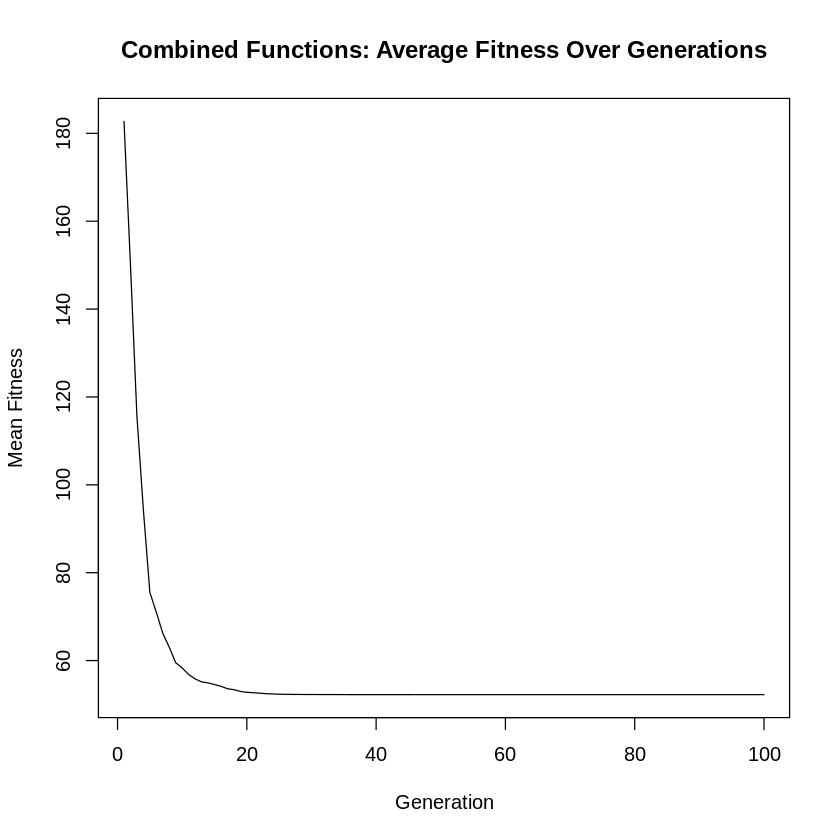

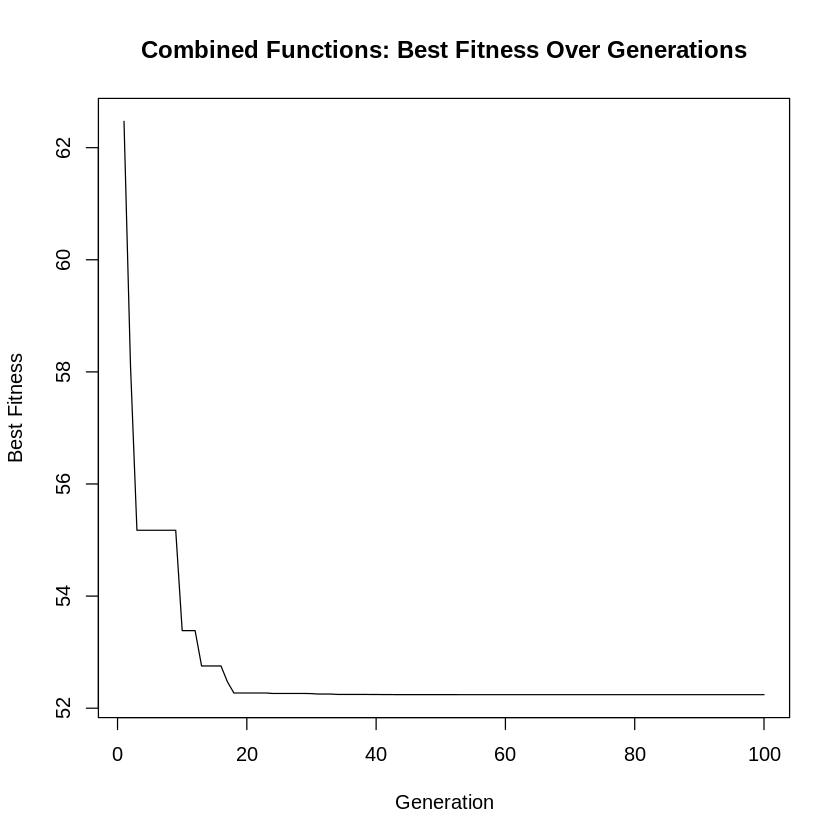

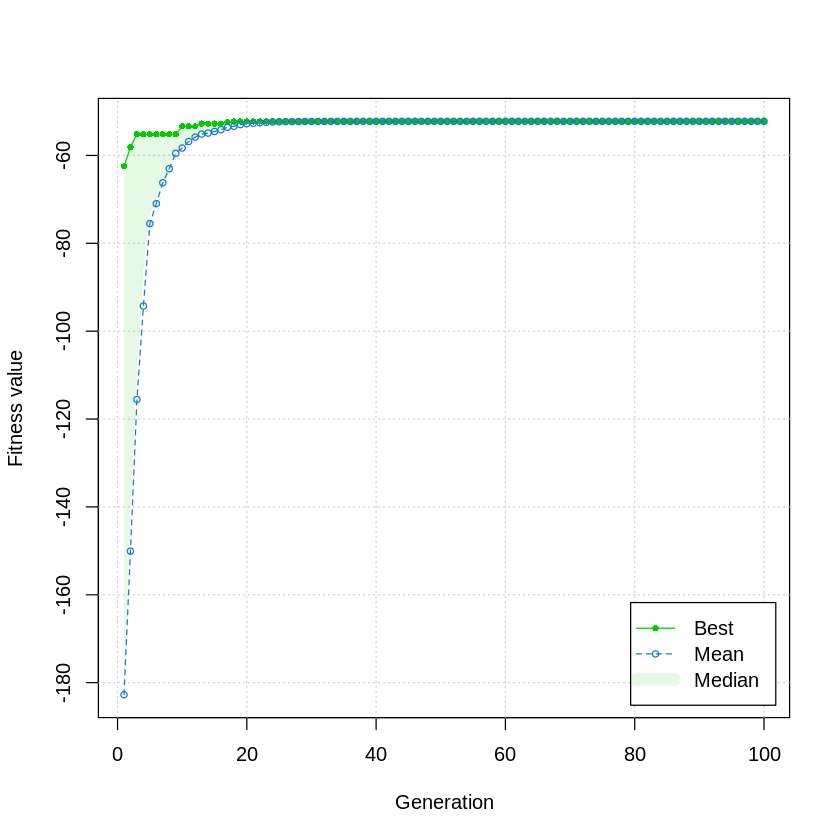

In [97]:
#placing more importance on function 1(cross section)
a = 0.7
b = 0.3
f <- outer(x1, x2, func3, x3, x4, a, b)

mean_fitness_values4 <- numeric()
best_fitness_values4 <- numeric()
solutions4 <- vector("list", length = 100)

#storing the mean and max values
monitor <- function(obj) {
  mean_fitness_values4 <<- c(mean_fitness_values4, -1 * mean(obj@fitness))
  best_fitness_values4 <<- c(best_fitness_values4, -1 * max(obj@fitness))
  solutions4[obj@iter] <<- obj@bestSol[obj@iter]
}

#Cross Section Area Function
GA <- ga(type = "real-valued",
         fitness =  function(x) - func3(x[1], x[2], x[3], x[4], a, b),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001, keepBest = TRUE, monitor = monitor)


summary(GA)

#printing out best fitness values for each generation
counter = 1
for (solution in solutions4){
  cat("Generation", counter, "Solution: ", solution, "\n")
  counter = counter + 1
}

plot(mean_fitness_values4, type = 'l', main = "Combined Functions: Average Fitness Over Generations",
      xlab = "Generation", ylab = "Mean Fitness")

plot(best_fitness_values4, type = 'l', main = "Combined Functions: Best Fitness Over Generations",
      xlab = "Generation", ylab = "Best Fitness")

plot(GA)

#Trial 4: The Minimization of the both functions in one function: $f_{3}$
##Goal:
>### The minimization of both functions by combining them into one function (favoring $f_{1}$)
##Method:
>### In this trial, I did the same thing as I did in trial 3 but **I decided to place more importance on $f_{1}$, the minimization of the cross section area.** I minimized the function $f_{3}$ by multiplying the $f_{3}$ by -1. I ran this algorithm for 100 generations using the values 0.75 and 0.001 as the crossover and mutation probability respectively, and a population of 50. I then stored the best solutions for each generation, along with the best and average fitness values for each generation, and plotted them to get a better image of my results.
##Results:
>### Since the function is supposed to be minimized, the lower the fitness value, the better it is. According the results displayed by the algorithm, the best fitness value for the $f_{3}$ started above 62 with the average fitness values of the beginning generation being around 180. After generation 20, the fitness values seem to reach a convergence at around 52-54, showing that the fitness value has reached the best value it could achieve and this convergence or stand still is shown in both the average and best graph where, after generation 20, there are rarely if any drops in the fitness value.
##Comparison to Trials 3:
>### In this trial and trial 3, both graphs reached convergence at around the same time (generation 20). The best fitness value obtained for this equation seems to be an inbetween of the best fitness values obtained from $f_{1}$ and $f_{2}$. However, in comparison to trial 3, this fitness value is much higher and closer to the fitness value obtained in $f_{1}$ whereas the fitness value for trial 3 was much lower and closer to the fitness value of $f_{2}$. This difference in the fitness values in this trial and trial 3 show the bias the difference in importance that I had added through the weights a and b. In this trial, the fitness value was much higher because I was favoring $f_{1}$ which had a much higher fitness value than $f_{2}$ and, in trial 3, the fitness value was lower because I was favoring $f_{2}$ which had a much lower fitness value than $f_{1}$.

Warning message in 2 * x2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x3 * (x1 - 2 * x4):
“longer object length is not a multiple of shorter object length”
Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in x3 * ((x1 - 2 * x4)^3):
“longer object length is not a multiple of shorter object length”
Warning message in 2 * x2 * x4:
“longer object length is not a multiple of shorter object length”
Warning message in (2 * x2 * x4) * (4 * (x4)^2):
“longer object length is not a multiple of shorter object length”
Warning message in x1 - 2 * x4:
“longer object length is not a multiple of shorter object length”


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -33.19304 
Solution = 
           x1       x2       x3       x4
[1,] 17.57088 11.13147 1.840226 1.371858

Generation 1 Solution:  14.04259 10.17911 4.376455 1.337638 
Generation 2 Solution:  14.04259 10.17911 4.376455 1.337638 
Generation 3 Solution:  14.04259 10.17911 4.376455 1.337638 
Generation 4 Solution:  14.04259 10.17911 4.376455 1.337638 
Generation 5 Solution:  16.86217 10.79964 3.338721 1.513613 
Generation 6 Solution:  16.86217 10.79964 3.338721 1.513613 
Generation 7 Solution:  20.99725 11.04635 1.935331 1.463272 
Generation 8 Solution:  20.99725 11.04635 1.935331 1.463272 
Generation 9 Solution:  20.99725 11.04635 1.935331 1.463272 
Generation 10 Solution:  20.99725 11.04635 1.935331 1.463272 
Generation 11 Solution:  17.23565 10.74062 2.330528 1.364902 
Generation 12 Solution:  18.00496 11.81097 1.955528 1.404769 
Generation 13 Solution:  17.86694 11.41769 2.085055 1.371786 
Generation 14 Solution:  17.31995 11.10416 2.085205 1.368599 
Generation 15 Solution:  17.4039 10.86274 2.131381 1.367725 
Generation 16 Solution:  17.4039 10.86274 2.131381 1.367725 
Generation 17 Solut

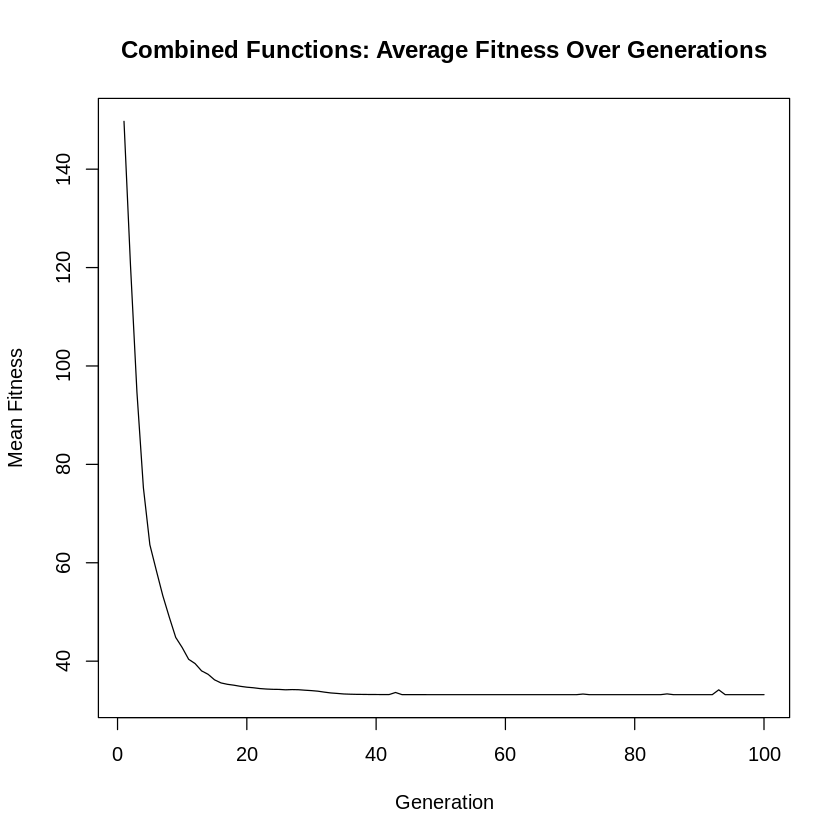

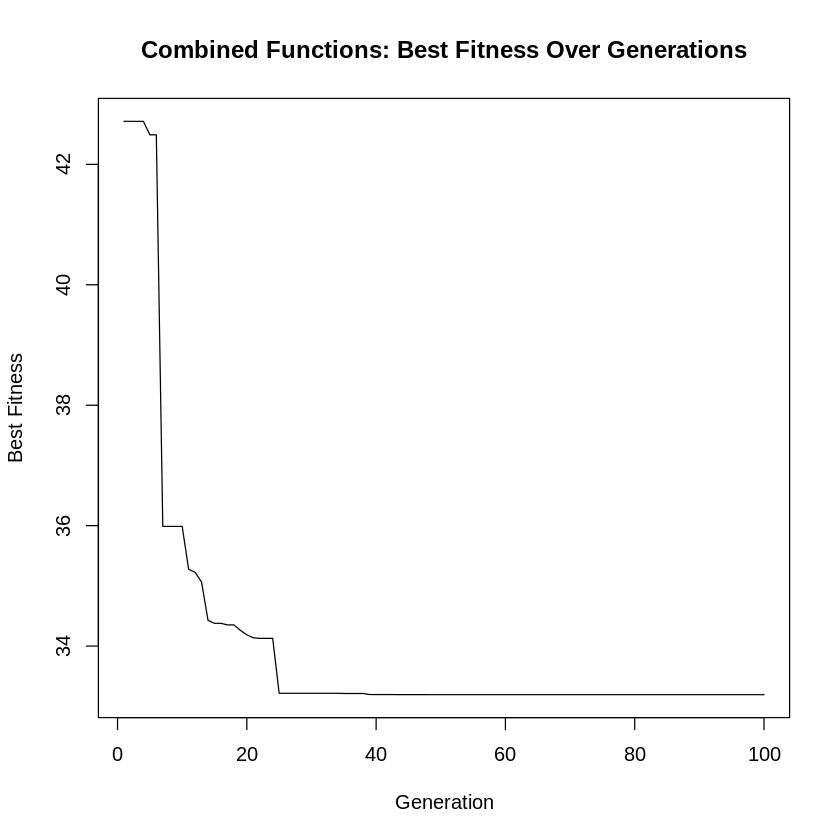

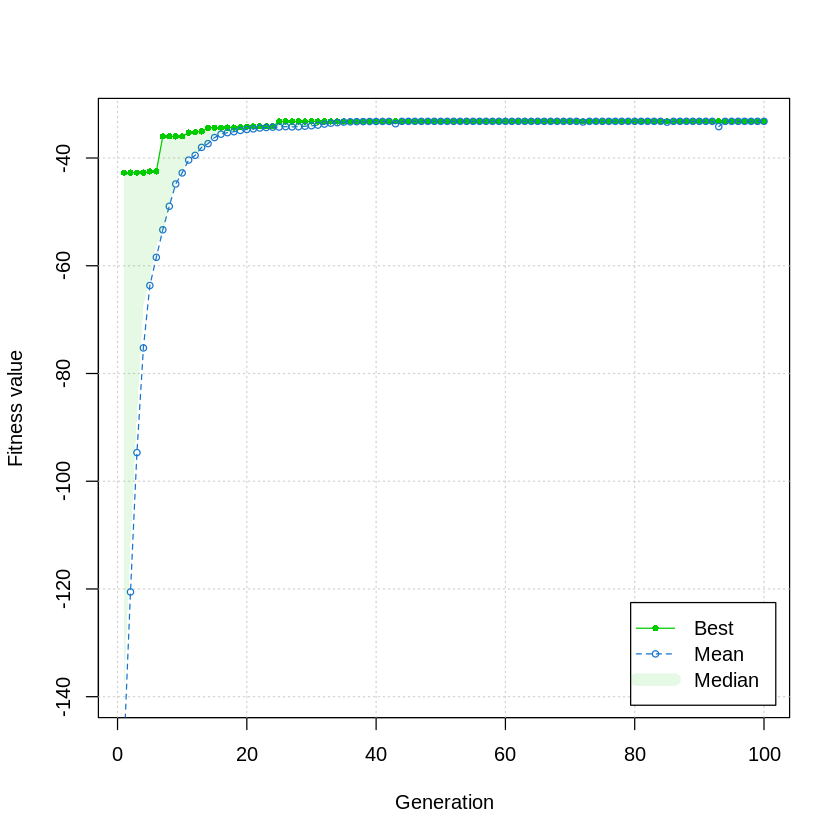

In [91]:
#giving equal importance to both the cross section area and the static deflection
a = 0.5
b = 0.5
f <- outer(x1, x2, func3, x3, x4, a, b)

mean_fitness_values5 <- numeric()
best_fitness_values5 <- numeric()
solutions5 <- vector("list", length = 100)

#storing the mean and max values
monitor <- function(obj) {
  mean_fitness_values5 <<- c(mean_fitness_values5, -1 * mean(obj@fitness))
  best_fitness_values5 <<- c(best_fitness_values5, -1 * max(obj@fitness))
  solutions5[obj@iter] <<- obj@bestSol[obj@iter]
}

#Cross Section Area Function
GA <- ga(type = "real-valued",
         fitness =  function(x) - func3(x[1], x[2], x[3], x[4], a, b),
         lower = c(10, 10, 0.9, 0.9), upper = c(80, 50, 5.0, 5.0),
         popSize = 50, maxiter = 100, run = 100, pcrossover = 0.75, pmutation = 0.001, keepBest = TRUE, monitor = monitor)


summary(GA)

#printing out best fitness values for each generation
counter = 1
for (solution in solutions5){
  cat("Generation", counter, "Solution: ", solution, "\n")
  counter = counter + 1
}

plot(mean_fitness_values5, type = 'l', main = "Combined Functions: Average Fitness Over Generations",
      xlab = "Generation", ylab = "Mean Fitness")

plot(best_fitness_values5, type = 'l', main = "Combined Functions: Best Fitness Over Generations",
      xlab = "Generation", ylab = "Best Fitness")

plot(GA)

#Trial 5: The Minimization of the both functions in one function: $f_{3}$
##Goal:
>### The minimization of both functions by combining them into one function (Equal Weight)
##Method:
>### In this trial, I did the same thing as I did in trials 3 and 4 but **I decided to both function equal importance so that they would both be considered without one having more influence than the other.** I minimized the function $f_{3}$ by multiplying the $f_{3}$ by -1. I ran this algorithm for 100 generations using the values 0.75 and 0.001 as the crossover and mutation probability respectively, and a population of 50. I then stored the best solutions for each generation, along with the best and average fitness values for each generation, and plotted them to get a better image of my results.
##Results:
>### Since the function is supposed to be minimized, the lower the fitness value, the better it is. According the results displayed by the algorithm, the best fitness value for $f_{3}$ started around 44 with the average fitness values of the beginning generation being around 150. After generation 20, the fitness values seem to reach a convergence at around 32 - 33, showing that the fitness value has reached the best value it could achieve and this convergence or stand still is shown in both the average and best graph where, after generation 20, there are rarely if any drops in the fitness value.
##Comparison to Trials 3 and 4:
>### In all three trials of $f_{3}$, they all seemed to reach a convergence in their fitness values after or around generation 20. The best fitness value obtained for this equation seems to be an inbetween of the best fitness values obtained from trials 3 and 4 of $f_{3}$. However, in comparison to trial 3, this fitness value is a little higher and, when comparing to trial 4, this vitness value is lower. This difference in the fitness values in this trial in comparison to trial 3 and 4 show how both function were considered equally because the fitness value obtained in between the two fitness values obtained when one function was being favored over the other.

#Concluding Remarks:
>### To recap, the goal of this experiment was to explore the minimization of three functions, two being completely opposite of each other, and the third being the combination of the other two equations with the goal of minimizing both functions at the same time. The first two trials show how the two equations were completely opposite of each other, with the minimization of one function resulting in the maximization of the other function. The next 3 trials then showed how the combination of these 2 functions and adding weights to them affected the obtained fitness value and solution that would be the compromise between the two. It was interesting to see how the weights affected the fitness value, with it being higher or lower depending on which function had more weight to it. What was even more fascinating was how, when the functions had equal weight, the fitness value ended up being in the range between the fitness values obtained when one function was being favored.